In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Responses.csv', encoding = 'latin1')

In [3]:
df.head()

,Name,AgeGroup,Gender,Hobbies,Frequency,HoursPerWeek,StressLevel,MoodEffect,Benefits,SocialContext,MentalHealth
0,Isha,18-24,Female,"Creative, Social",Several times a week,1 to 3 hours,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,8
1,Aditya,18-24,Male,"Intellectual, Others",Several times a week,4 to 7 hours,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,8
2,Ayush,18-24,Male,"Physical, Intellectual, Social",Weekly,8+ hours,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,10
3,Samrat,18-24,Male,"Creative, Physical, Intellectual",Daily,8+ hours,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3
4,Kashish,18-24,Female,Physical,Less frequently,Less than 1 hour,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,8


In [4]:
df['StressLevel'].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

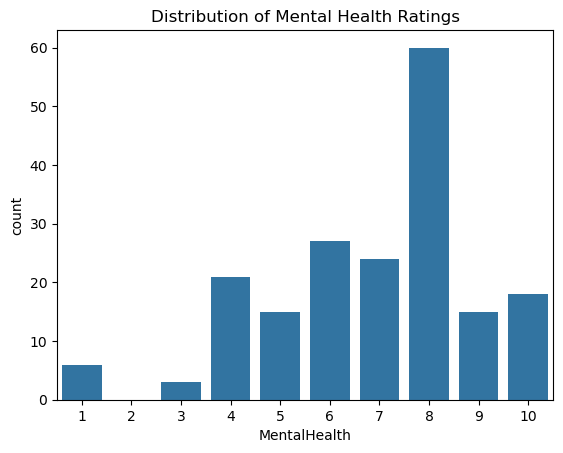

In [5]:
sns.countplot(x='MentalHealth',data=df , order = range(1,11))
plt.title("Distribution of Mental Health Ratings")
plt.show()

In [6]:
print(df['MentalHealth'].value_counts().sort_index())

MentalHealth
1      6
3      3
4     21
5     15
6     27
7     24
8     60
9     15
10    18
Name: count, dtype: int64


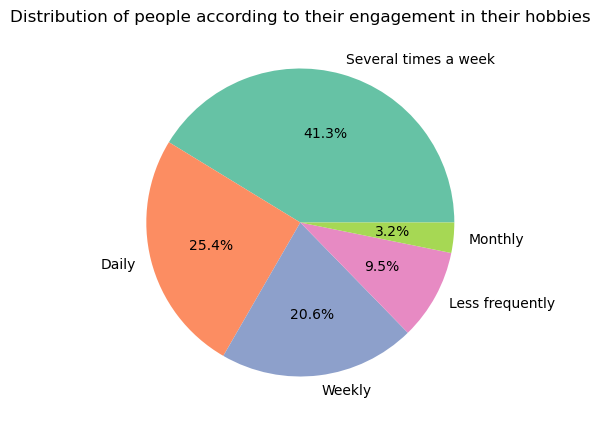

In [7]:
plt.figure(figsize = (5,5))
counts = df['Frequency'].value_counts()
plt.pie(counts,labels = counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Distribution of people according to their engagement in their hobbies')
plt.show()

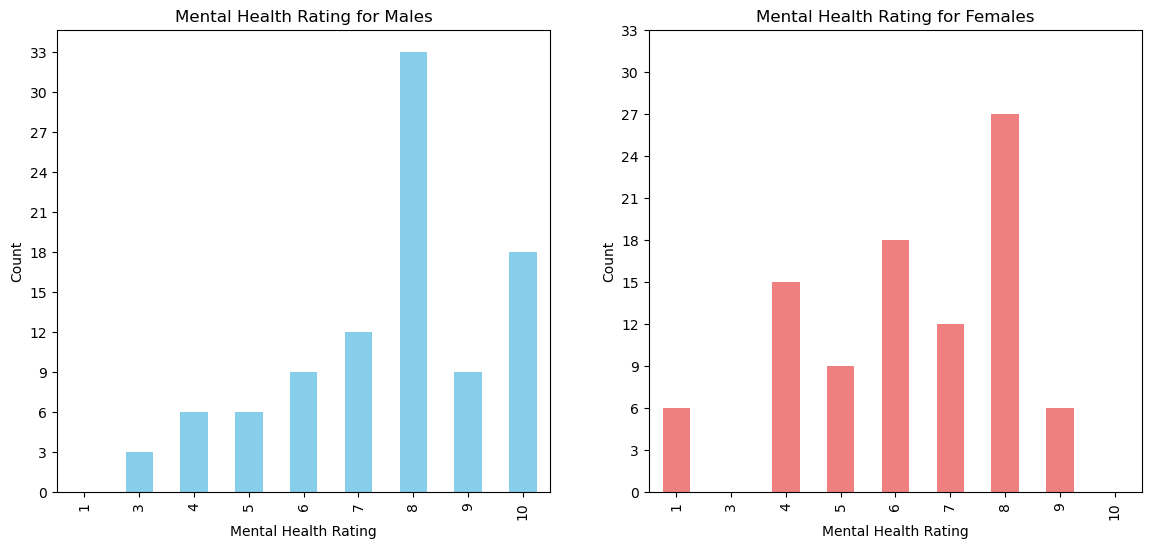

In [8]:
gender_mental_health = df.groupby(['Gender', 'MentalHealth']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
gender_mental_health.loc['Male'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mental Health Rating for Males')
axes[0].set_xlabel('Mental Health Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(gender_mental_health.columns)
gender_mental_health.loc['Female'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Mental Health Rating for Females')
axes[1].set_xlabel('Mental Health Rating')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(gender_mental_health.columns)
y_max = gender_mental_health.max().max()
axes[0].set_yticks(np.arange(0, y_max + 2, step = 3))
axes[1].set_yticks(np.arange(0, y_max + 2, step = 3))
plt.show()

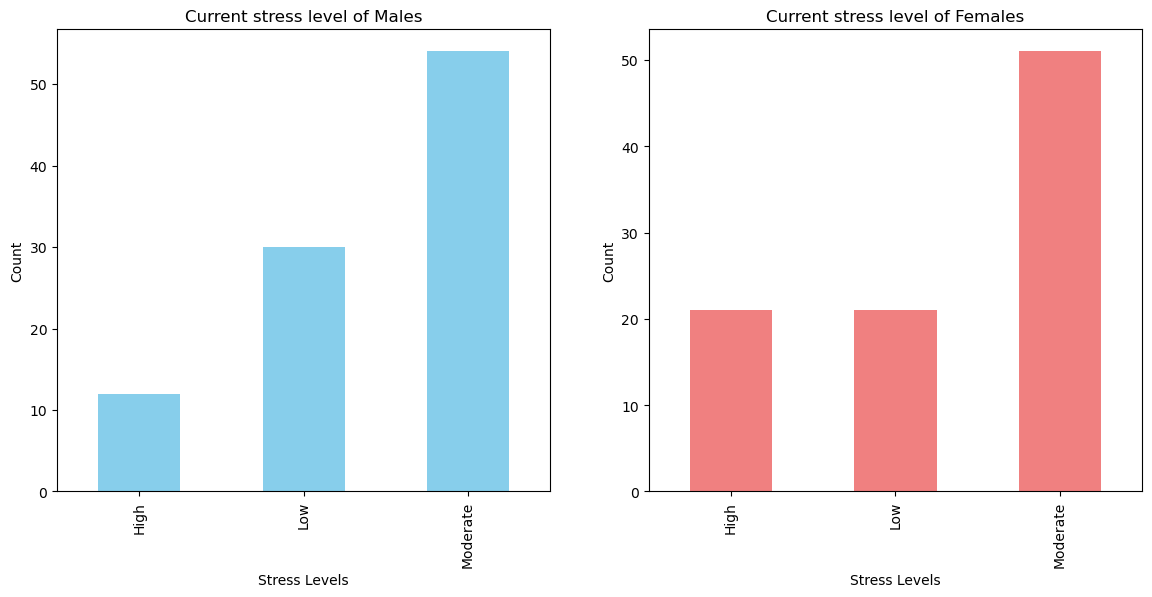

In [9]:
gender_mental_health = df.groupby(['Gender', 'StressLevel']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bars_male = gender_mental_health.loc['Male'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Current stress level of Males')
axes[0].set_xlabel('Stress Levels')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(gender_mental_health.columns)
bars_female = gender_mental_health.loc['Female'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Current stress level of Females')
axes[1].set_xlabel('Stress Levels')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(gender_mental_health.columns)
plt.show()

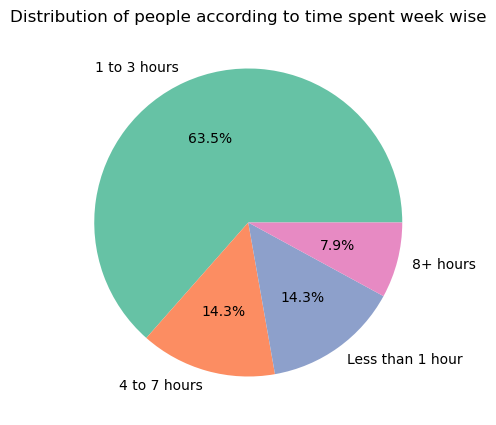

In [10]:
plt.figure(figsize = (5,5))
counts = df['HoursPerWeek'].value_counts()
plt.pie(counts,labels = counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Distribution of people according to time spent week wise')
plt.show()

In [11]:
df['NumberOfHobbies'] = df['Hobbies'].apply(lambda x: len(x.split(',')))
df.head()

,Name,AgeGroup,Gender,Hobbies,Frequency,HoursPerWeek,StressLevel,MoodEffect,Benefits,SocialContext,MentalHealth,NumberOfHobbies
0,Isha,18-24,Female,"Creative, Social",Several times a week,1 to 3 hours,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,8,2
1,Aditya,18-24,Male,"Intellectual, Others",Several times a week,4 to 7 hours,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,8,2
2,Ayush,18-24,Male,"Physical, Intellectual, Social",Weekly,8+ hours,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,10,3
3,Samrat,18-24,Male,"Creative, Physical, Intellectual",Daily,8+ hours,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3,3
4,Kashish,18-24,Female,Physical,Less frequently,Less than 1 hour,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,8,1


In [12]:
print(df['MentalHealth'].min())
print(df['MentalHealth'].max())

1
10


In [13]:
df2 = df

In [14]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns = ['MentalHealth','Name'])
y = df2['MentalHealth']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
type(X_train)

pandas.core.frame.DataFrame

In [15]:
df2['AgeGroup'].unique()

array(['18-24', '14-17', '25-34', '45-54', '35-44'], dtype=object)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
def encoder1(var):
    hobbieslist = var['Hobbies'].tolist()
    Creative = [0]*var.shape[0]
    Social = [0]*var.shape[0]
    Physical = [0]*var.shape[0]
    Intellectual = [0]*var.shape[0]
    OtherHobbies = [0]*var.shape[0]
    k = 0
    for i in hobbieslist:
        if isinstance(i, list):
            hobbies_list = i
        else:
            hobbies_list = i.split(', ')
        for j in hobbies_list:
            if j == 'Creative':
                Creative[k] = 1
            elif j == 'Social':
                Social[k] = 1
            elif j == 'Physical':
                Physical[k] = 1
            elif j == 'Intellectual':
                Intellectual[k] = 1
            else:
                OtherHobbies[k] = 1
        k = k+1
    var['Creative_Hobbies'] = Creative
    var['Social_Hobbies'] = Social
    var['Physical_Hobbies'] = Physical
    var['Intellectual_Hobbies'] = Intellectual
    var['Other_Hobbies'] = OtherHobbies
    var.drop(columns = 'Hobbies',inplace = True)
    return var
def encoder2(var):
    benefitslist = var['Benefits'].tolist()
    Relaxation = [0]*var.shape[0]
    ImprovedFocus = [0]*var.shape[0]
    ReducedStress = [0]*var.shape[0]
    IncreasedHappiness = [0]*var.shape[0]
    OtherBenefits = [0]*var.shape[0]
    k = 0
    for i in benefitslist:
        if isinstance(i, list):
            benefits_list = i
        else:
            benefits_list = i.split(', ')
        for j in benefits_list:
            if j == 'Relaxation':
                Relaxation[k] = 1
            elif j == 'Improved Focus':
                ImprovedFocus[k] = 1
            elif j == 'Reduced Stress':
                ReducedStress[k] = 1
            elif j == 'Increased Happiness':
                IncreasedHappiness[k] = 1
            else:
                OtherBenefits[k] = 1
        k = k+1
    var['Relaxation_Benefit'] = Relaxation
    var['Improved_Focus_Benefit'] = ImprovedFocus
    var['Reduced_Stress_Benefits'] = ReducedStress
    var['Increased_Happiness_Benefits'] = IncreasedHappiness
    var['Other_Benefits'] = OtherBenefits
    var.drop(columns = 'Benefits',inplace = True)
    return var
def encoder3(var):
    frequencyencoder = OrdinalEncoder(categories=[['Daily', 'Several times a week', 'Weekly','Less frequently','Monthly']])
    moodencoder = OrdinalEncoder(categories = [['Worsens my mood','No noticeable change','Improves my mood']])
    ageencoder = OrdinalEncoder(categories = [['14-17','18-24','25-34','35-44','45-54']])
    var[['Frequency']] = frequencyencoder.fit_transform(var[['Frequency']])
    var[['MoodEffect']] = moodencoder.fit_transform(var[['MoodEffect']])
    var[['AgeGroup']] = ageencoder.fit_transform(var[['AgeGroup']])
    return var
def encoder4(var):
    hoursencoder = OrdinalEncoder(categories=[['Less than 1 hour' , '1 to 3 hours' , '4 to 7 hours' , '8+ hours']])
    stressencoder = OrdinalEncoder(categories=[['Low' , 'Moderate' , 'High']])
    genderencoder = LabelEncoder()
    socialencoder = OrdinalEncoder(categories = [['Alone', 'Both equally', 'With friends or groups']])
    var[['HoursPerWeek']] = hoursencoder.fit_transform(var[['HoursPerWeek']])
    var[['StressLevel']] = stressencoder.fit_transform(var[['StressLevel']])
    var['Gender'] = genderencoder.fit_transform(var['Gender'])
    var[['SocialContext']] = socialencoder.fit_transform(var[['SocialContext']])
    return var
transformer1 = FunctionTransformer(encoder1)
transformer2 = FunctionTransformer(encoder2)
transformer3 = FunctionTransformer(encoder3)
transformer4 = FunctionTransformer(encoder4)
pipe = Pipeline([('Encoder1', transformer1),('Encoder2' , transformer2),('Encoder3', transformer3),('Encoder4' , transformer4)])

In [17]:
df2.head()

,Name,AgeGroup,Gender,Hobbies,Frequency,HoursPerWeek,StressLevel,MoodEffect,Benefits,SocialContext,MentalHealth,NumberOfHobbies
0,Isha,18-24,Female,"Creative, Social",Several times a week,1 to 3 hours,Low,Improves my mood,"Relaxation, Improved focus",With friends or groups,8,2
1,Aditya,18-24,Male,"Intellectual, Others",Several times a week,4 to 7 hours,Moderate,Improves my mood,"Relaxation, Improved focus",Alone,8,2
2,Ayush,18-24,Male,"Physical, Intellectual, Social",Weekly,8+ hours,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress",Both equally,10,3
3,Samrat,18-24,Male,"Creative, Physical, Intellectual",Daily,8+ hours,High,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",With friends or groups,3,3
4,Kashish,18-24,Female,Physical,Less frequently,Less than 1 hour,Moderate,Improves my mood,"Relaxation, Improved focus, Reduced stress, In...",Both equally,8,1


In [18]:
X_train = pipe.fit_transform(X_train)

In [19]:
X_test = pipe.fit_transform(X_test)

In [20]:
X_train.head()

,AgeGroup,Gender,Frequency,HoursPerWeek,StressLevel,MoodEffect,SocialContext,NumberOfHobbies,Creative_Hobbies,Social_Hobbies,Physical_Hobbies,Intellectual_Hobbies,Other_Hobbies,Relaxation_Benefit,Improved_Focus_Benefit,Reduced_Stress_Benefits,Increased_Happiness_Benefits,Other_Benefits
177,1.0,1,1.0,3.0,0.0,2.0,2.0,2,0,0,1,0,1,1,0,0,0,1
46,1.0,1,2.0,1.0,0.0,2.0,2.0,1,0,0,0,0,1,1,0,0,0,1
95,1.0,1,0.0,1.0,1.0,2.0,0.0,1,0,0,0,0,1,0,0,0,0,1
82,4.0,0,0.0,0.0,1.0,2.0,0.0,1,0,0,0,0,1,1,0,0,0,1
180,1.0,1,2.0,1.0,0.0,2.0,2.0,2,0,0,1,0,1,1,0,0,0,1


In [21]:
X_train.head()

,AgeGroup,Gender,Frequency,HoursPerWeek,StressLevel,MoodEffect,SocialContext,NumberOfHobbies,Creative_Hobbies,Social_Hobbies,Physical_Hobbies,Intellectual_Hobbies,Other_Hobbies,Relaxation_Benefit,Improved_Focus_Benefit,Reduced_Stress_Benefits,Increased_Happiness_Benefits,Other_Benefits
177,1.0,1,1.0,3.0,0.0,2.0,2.0,2,0,0,1,0,1,1,0,0,0,1
46,1.0,1,2.0,1.0,0.0,2.0,2.0,1,0,0,0,0,1,1,0,0,0,1
95,1.0,1,0.0,1.0,1.0,2.0,0.0,1,0,0,0,0,1,0,0,0,0,1
82,4.0,0,0.0,0.0,1.0,2.0,0.0,1,0,0,0,0,1,1,0,0,0,1
180,1.0,1,2.0,1.0,0.0,2.0,2.0,2,0,0,1,0,1,1,0,0,0,1


In [22]:
clf = tree.DecisionTreeClassifier(class_weight = 'balanced')
clf = clf.fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)

for pred, actual in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {actual}")

Predicted: 4, Actual: 4
Predicted: 10, Actual: 10
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 7
Predicted: 8, Actual: 7
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 8, Actual: 6
Predicted: 6, Actual: 6
Predicted: 3, Actual: 3
Predicted: 9, Actual: 9
Predicted: 9, Actual: 9
Predicted: 8, Actual: 6
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 10, Actual: 10
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 4, Actual: 4
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predic

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9206349206349206


In [26]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [27]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [28]:
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [29]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(class_weight='balanced'),
 'n_jobs': None,
 'param_grid': {'max_depth': [3, 5, 10, None],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'criterion': ['gini', 'entropy']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [30]:
grid.fit(X_train, y_train)

C:\Users\Isha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)
best_model = grid.best_estimator_

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8723076923076922


In [32]:
y_test.count()

63

In [33]:
y_pred_b = best_model.predict(X_test)
count_total = y_test.count()
for pred_b, actual in zip(y_pred_b, y_test):
    print(f"Predicted: {pred_b}, Actual: {actual}")
accuracy = accuracy_score(y_test, y_pred_b)
print(accuracy)

Predicted: 4, Actual: 4
Predicted: 10, Actual: 10
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 7
Predicted: 8, Actual: 7
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 8, Actual: 6
Predicted: 6, Actual: 6
Predicted: 3, Actual: 3
Predicted: 9, Actual: 9
Predicted: 9, Actual: 9
Predicted: 8, Actual: 6
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 10, Actual: 10
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 9, Actual: 9
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 8, Actual: 8
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 10, Actual: 10
Predicted: 4, Actual: 4
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predic

In [69]:
plt.figure(figsize=(200,50))
tree.plot_tree(best_model, filled = True,rounded=True, fontsize=10)
plt.savefig('foo.png')

In [34]:
with open('model','wb') as f:
    pickle.dump(best_model,f)